### Introduction
This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Data sources:

Both Observations.csv and Species_info.csv was provided by Codecademy.com.

### Scoping
It's beneficial to create a project scope whenever a new project is being started. Four sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and questions that are aligned with the project goals. Lastly, evaluation will help us build conclusions and findings from our analysis.

### Project Goals
In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

* What is the distribution of conservation status for species?
* Are certain types of species more likely to be endangered?
* Are the differences between species and their conservation status significant?
* Occurence of protected species by category in each national park


In [19]:
# Import python modules

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns


### Loading the Data

The columns included in observations.csv are:
* scientific_name - The scientific name of each species
* park_name - The name of national park where the species was observed
* observations - The number of times the species was observed 

The columns included in species_info.csv are: 
* category - The taxonomic category of each species
* scientific_name - The scientific name of each species
* common_names - The common names of each species
* conservation_status - The conservation status of each species

In [20]:
observations = pd.read_csv('observations.csv', encoding = 'utf-8')
species = pd.read_csv('species_info.csv', encoding = 'utf-8')
print(observations.head(10))
print(species.head(10))

                     scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virginicus               Yosemite National Park   
6                   Spizella pusilla            Yellowstone National Park   
7                  Elymus multisetus  Great Smoky Mountains National Park   
8             Lysimachia quadrifolia               Yosemite National Park   
9         Diphyscium cumberlandianum            Yellowstone National Park   

   observations  
0            68  
1            77  
2           138  
3            84  
4            85  
5           112  
6           228  
7       

### Exploring the Data

In [21]:
# Data dimensions
print(f"Observations shape: {observations.shape}")
print(f"Species shape: {species.shape}")

Observations shape: (23296, 3)
Species shape: (5824, 4)


In [22]:
# Number of species, number of categories, number of species per category
print(f"Number of species: {species.scientific_name.nunique()}")
print(f"Number of categories: {species.category.nunique()}")
print(f"Categories: {species.category.unique()}")
print(f"Number of species per category: {species.groupby('category').size()}")

Number of species: 5541
Number of categories: 7
Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
Number of species per category: category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


In [23]:
# Exploring conservation statuses
print(f"Number of conservation statuses: {species.conservation_status.nunique()}")
print(f"Unique conservation statuses: {species.conservation_status.unique()}")

print(f"NaN values: {species.conservation_status.isna().sum()}")
print(f"Number of species per conservation status: {species.groupby('conservation_status').size()}")

Number of conservation statuses: 4
Unique conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
NaN values: 5633
Number of species per conservation status: conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


In [24]:
# Exploring parks and observations
print(f"Number of parks: {observations.park_name.nunique()}")
print(f"Unique parks: {observations.park_name.unique()}")
print(f"Number of observations:{observations.observations.sum()}")

Number of parks: 4
Unique parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
Number of observations:3314739


### Analysis

#### What is the distribution of conservation status for each category of species? 

In [25]:
# Fill NaN values in conservation_status to 'No Intervention'
species.conservation_status.fillna("No Intervention", inplace=True)
print(f"Number of species per conservation status: {species.groupby('conservation_status').size()}")

Number of species per conservation status: conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64


In [26]:
ConservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

ConservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


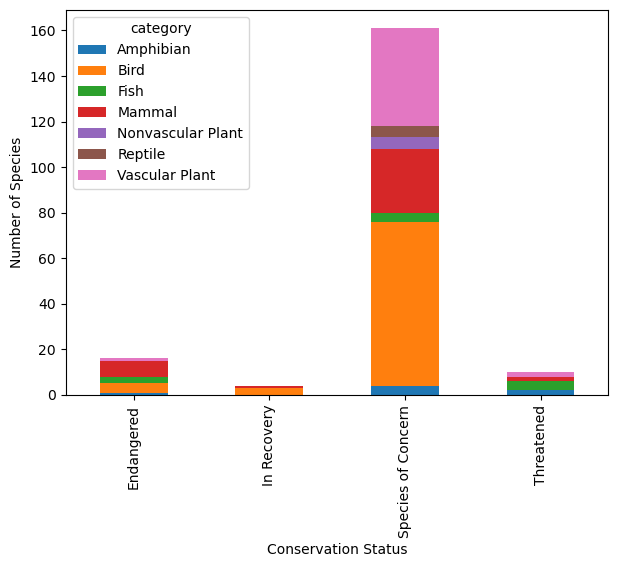

In [27]:
ax = ConservationCategory.plot(kind = 'bar', figsize=(7,5), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

#### Are certain types of species more likely to be endangered?

In [28]:
# Creating a table of species categories and count of protected and unprotected species 

species['is_protected'] = species.conservation_status != 'No Intervention'

category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


From the table above, we can see that birds and mammals have the highest percentage of protected species. We can say that species of these two categories are more likely to be endangered. 

#### Are the differences between species and their conservation status significant?

In [29]:
# Using chi-squared tests to determine if different conservation status rates is statistically significant
# I will perform tests between Mammals vs Birds, and Mammals vs Reptiles 

from scipy.stats import chi2_contingency

# Setting up contingency tables 
mammals_birds = [[30,146],
                [75,413]]
mammals_reptiles = [[30,146],
                [5,73]]


# Calculating chi-squared statistics
chi2, p_value, dof, expected = chi2_contingency(mammals_birds)
print(f"Mammals vs Birds p-value: {p_value}")
chi2, p_value, dof, expected = chi2_contingency(mammals_reptiles)
print(f"Mammals vs Reptiles p-value: {p_value}")


Mammals vs Birds p-value: 0.6875948096661336
Mammals vs Reptiles p-value: 0.03835559022969898


The standard p-value to test statistical significance is 0.05. 

The p-value retrieved from the test between mammals and birds is 0.69, which is much larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them. We can say that the variables independent.  

The p-value between mammals and reptiles is 0.038 which is below the standard threshold of 0.05. Therefore, the difference in conservation status rates of mammals and reptiles is statistically significant. Mammals have a statistically significant higher rate of needed protection compared to reptiles.

#### Occurence of protected species by category in each national park

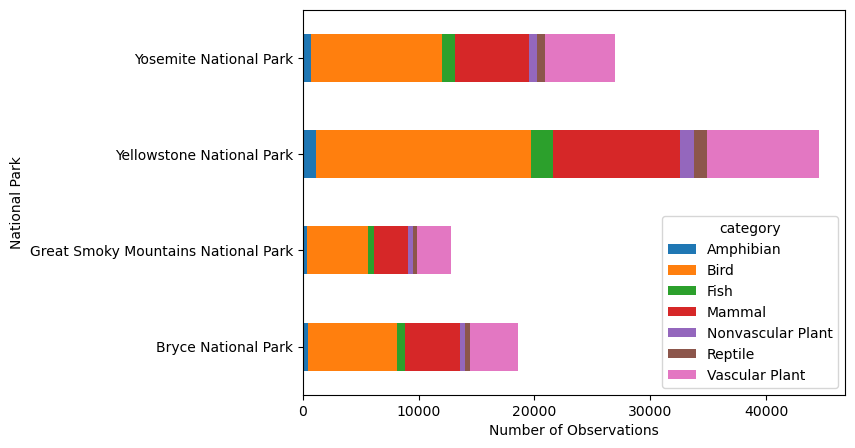

In [48]:
joined_df = observations.merge(species, on = 'scientific_name')

joined_df = joined_df[joined_df.conservation_status != 'No Intervention']

ParkCategory = joined_df\
    .groupby(['park_name','category'])['observations']\
    .sum()\
    .unstack()

ParkCategory

ax = ParkCategory.plot(kind = 'barh', figsize=(7,5), 
                               stacked=True)
ax.set_ylabel("National Park")
ax.set_xlabel("Number of Observations");

### Conclusion

The project was able to make data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

#### What is the distribution of conservation status for species?
The vast majority of species were not part of conservation (5,633 vs 191). Vascular plants and birds make up a large portion of protected species. 

#### Are certain types of species more likely to be endangered?
Mammals and Birds had the highest percentage of being protected. 

#### Are the differences between species and their conservation status significant?
While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.

#### Occurence of protected species by category in each national park
Of the observed protected species, the distribution of categories is approximately the same in each national park although varying in count. 
